In [1]:
## Import and load data
%matplotlib inline
import pickle
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
plt.style.use('fivethirtyeight')

## loading data from tv ad .csv
df = pd.read_pickle('data/pres_sorted_with_sponsors_and_party_and_fact_check.pkl')
df_unique = pd.read_csv('data/unique_ads_aired.csv')

In [2]:
## ad counts for HRC
dem_counts = df[df.party == 'D'].archive_id.value_counts()
## ad counts for Trump
rep_counts = df[df.party == 'R'].archive_id.value_counts()

In [3]:
print(df_unique.dtypes)
df_unique_crop = df_unique.copy()

wp_identifier        int64
archive_id          object
embed_url           object
sponsors            object
sponsor_types       object
subjects            object
candidates          object
type                object
race                object
cycle              float64
message             object
air_count            int64
reference_count      int64
market_count         int64
transcript          object
date_ingested       object
dtype: object


In [4]:
drop_list = ['sponsor_types', 'wp_identifier', 'embed_url', 'candidates', 'type', 'race', 'cycle', 'air_count', 'transcript', 'reference_count', 'market_count']
df_unique_crop = df_unique_crop.drop(drop_list, axis=1)
df_unique_crop.dtypes

archive_id       object
sponsors         object
subjects         object
message          object
date_ingested    object
dtype: object

In [87]:
print(dem_counts.values)

[3525 3062 2494 2463 2389 2309 2301 2076 1916 1883 1689 1599 1573 1393 1390
 1385 1357 1249 1199 1111 1084 1030 1006 1001  849  744  704  689  678  662
  661  515  429  417  366  311  309  295  264  195  175  139  138  129  103
   96   95   90   88   85   81   57   57   46   39   37   36   33   32   25
   25   21   21   18   18   18   18   16   16   16   15   15   14   14   12
   12   11   10   10    9    8    8    8    7    7    7    6    6    6    5
    5    5    5    5    5    5    5    5    5    5    5    5    4    4    4
    4    3    3    3    3    3    2    2    2    2    2    2    2    2    2
    2    2    2    2    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1]


In [89]:
print(dem_counts.index[0])
dem_unique = pd.DataFrame()
for row in range(10):
    add_me = df_unique_crop[df_unique_crop['archive_id'] == dem_counts.index[row]]
    dem_unique = dem_unique.append(add_me)
dem_unique = dem_unique.drop('archive_id', axis=1)
dem_unique.index = range(1,11)
dem_unique.total_airings = dem_counts.values

from IPython.display import HTML
h = HTML(dem_unique.to_html())
my_file = open('./granular_pics/dem_unique_table.html', 'w')
my_file.write(h.data)
my_file.close()

PolAd_DonaldTrump_9tux6


In [7]:
print(rep_counts.index[0])
rep_unique = pd.DataFrame()
for row in range(10):
    add_me = df_unique_crop[df_unique_crop['archive_id'] == rep_counts.index[row]]
    rep_unique = rep_unique.append(add_me)
rep_unique = rep_unique.drop('archive_id', axis=1)
rep_unique.index = range(1,11)

from IPython.display import HTML
h = HTML(rep_unique.to_html())
my_file = open('./granular_pics/rep_unique_table.html', 'w')
my_file.write(h.data)
my_file.close()

PolAd_HillaryClinton_DonaldTrump_o35rq


In [25]:
## Location counts for each of Top 10 ads for each candidate
df_dem = df[df['party'] == 'D']
df_dem_ad_loc = df_dem.groupby(['archive_id', 'location']).count()
df_dem_ad_loc.reset_index(inplace=True)
df_dem_ad_loc = df_dem_ad_loc.drop(['wp_identifier', 'network', 'program', 'program_type', 'start_time', 'end_time', 
                               'embed_url', 'day_of_week', 'metro_area', 'state', 'subject_count', 'hour_aired',
                               'sponsor_class', 'party', 'date_aired', 'r_c', 'fc_min', 'sponsors', 'sponsor_types',
                               'race', 'cycle', 'subjects', 'candidates', 'type', 'message', 'date_created', 'ad_length'],
                               axis=1)

In [26]:
df_dem_ad_loc.head()

,archive_id,location,id
0,PolAd_DonaldTrump_03x83,"Cleveland, Ohio",1
1,PolAd_DonaldTrump_03x83,"Las Vegas, NV",1
2,PolAd_DonaldTrump_03x83,"San Francisco-Oakland-San Jose, CA",4
3,PolAd_DonaldTrump_0mdjo,"San Francisco-Oakland-San Jose, CA",678
4,PolAd_DonaldTrump_17qix,"San Francisco-Oakland-San Jose, CA",2


In [33]:
dem_ad_loc_10 = pd.DataFrame()
for row in range(10):
    add_me = df_dem_ad_loc[df_dem_ad_loc['archive_id'] == dem_counts.index[row]]
    dem_ad_loc_10 = dem_ad_loc_10.append(add_me)
#dem_unique = dem_unique.drop('archive_id', axis=1)
dem_ad_loc_10 = dem_ad_loc_10.pivot(index='archive_id', columns='location', values='id')
dem_ad_loc_10

location,"Boston, MA/Manchester, NH","Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa","Cleveland, Ohio","Denver, CO","Las Vegas, NV","Milwaukee, WI","New York City, NY","Philadelphia, PA","Phoenix-Prescott, AZ","Raleigh-Durham-Fayetteville, NC","San Francisco-Oakland-San Jose, CA","Tampa-St. Petersburg, FL","Washington, DC/Hagerstown, MD"
archive_id,,,,,,,,,,,,,
PolAd_DonaldTrump_1hw0n,216.0,203.0,185.0,11.0,317.0,125.0,NaN,274.0,433.0,234.0,157.0,223.0,11.0
PolAd_DonaldTrump_51inm,122.0,285.0,298.0,NaN,319.0,102.0,NaN,369.0,77.0,341.0,89.0,299.0,NaN
PolAd_DonaldTrump_5rk9i,193.0,NaN,348.0,462.0,479.0,132.0,NaN,564.0,NaN,144.0,NaN,141.0,NaN
PolAd_DonaldTrump_9tux6,263.0,127.0,55.0,335.0,288.0,251.0,NaN,454.0,904.0,98.0,79.0,420.0,251.0
PolAd_DonaldTrump_HillaryClinton_1r60p,144.0,283.0,269.0,7.0,263.0,118.0,NaN,330.0,416.0,149.0,87.0,235.0,8.0
PolAd_DonaldTrump_byo3d,138.0,162.0,357.0,NaN,438.0,NaN,NaN,413.0,NaN,213.0,3.0,352.0,NaN
PolAd_DonaldTrump_ob6cq,272.0,111.0,177.0,256.0,210.0,206.0,1.0,595.0,204.0,82.0,378.0,360.0,210.0
PolAd_DonaldTrump_p3snl,143.0,167.0,211.0,155.0,284.0,129.0,NaN,187.0,147.0,98.0,21.0,339.0,2.0
PolAd_HillaryClinton_f1h3j,NaN,219.0,306.0,NaN,327.0,NaN,NaN,332.0,NaN,398.0,NaN,334.0,NaN


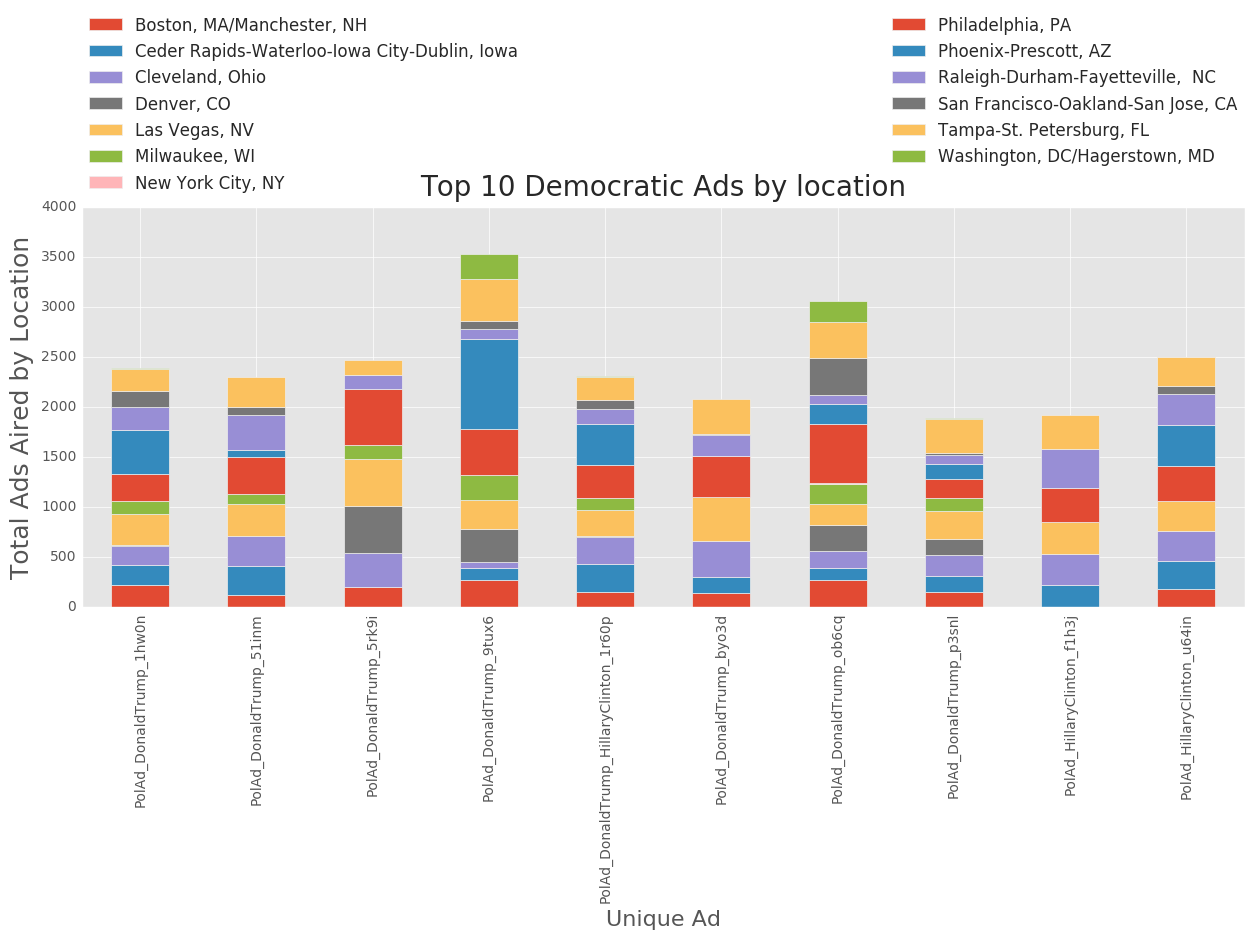

In [66]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,5))
ax = dem_ad_loc_10.plot(ax=ax, kind='bar', stacked=True)

# Add some more Labeling
ax.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.title("Top 10 Democratic Ads by location",  y=1.01, size=20)
plt.xlabel("Unique Ad", size=16)
plt.ylabel("Total Ads Aired by Location", size=18)
plt.savefig('granular_pics/dem_unique_bar_location.png')

In [43]:
plt.style.available

['seaborn-dark',
 'seaborn-white',
 'seaborn-deep',
 'seaborn-muted',
 'bmh',
 'seaborn-pastel',
 'seaborn-paper',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-poster',
 'ggplot',
 'seaborn-dark-palette',
 'classic',
 'dark_background',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-darkgrid',
 'grayscale',
 'seaborn-notebook',
 'seaborn-whitegrid',
 'fivethirtyeight']

In [53]:
## group by date aired and location for top ad
df_dem_ad1 = df_dem[df_dem['archive_id'] == dem_counts.index[0]]
df_dem_ad1_date_loc = df_dem_ad1.groupby(['date_aired', 'location']).count()
df_dem_ad1_date_loc.reset_index(inplace=True)
df_dem_ad1_date_loc = df_dem_ad1_date_loc.drop(['wp_identifier', 'network', 'program', 'program_type', 'start_time', 'end_time', 
                               'embed_url', 'day_of_week', 'metro_area', 'state', 'subject_count', 'hour_aired',
                               'sponsor_class', 'party', 'archive_id', 'r_c', 'fc_min', 'sponsors', 'sponsor_types',
                               'race', 'cycle', 'subjects', 'candidates', 'type', 'message', 'date_created', 'ad_length'],
                               axis=1)
df_dem_ad1_date_loc = df_dem_ad1_date_loc.pivot(index='date_aired', columns='location', values='id')
df_dem_ad1_date_loc.head()

location,"Boston, MA/Manchester, NH","Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa","Cleveland, Ohio","Denver, CO","Las Vegas, NV","Milwaukee, WI","Philadelphia, PA","Phoenix-Prescott, AZ","Raleigh-Durham-Fayetteville, NC","San Francisco-Oakland-San Jose, CA","Tampa-St. Petersburg, FL","Washington, DC/Hagerstown, MD"
date_aired,,,,,,,,,,,,
2016-08-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-06,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2016-08-07,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2016-08-08,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
2016-08-09,5.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN


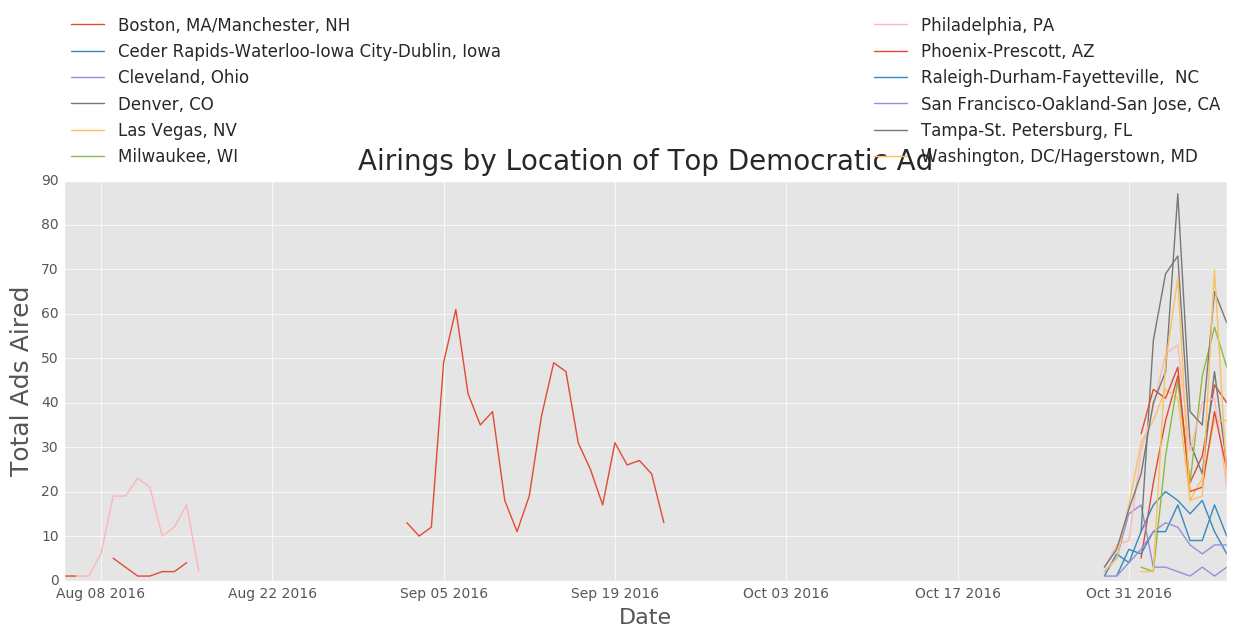

In [65]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,5))
ax = df_dem_ad1_date_loc.plot(ax=ax)

# Add some more Labeling
ax.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.title("Airings by Location of Top Democratic Ad",  y=1.01, size=20)
plt.xlabel("Date", size=16)
plt.ylabel("Total Ads Aired", size=18)
plt.savefig('granular_pics/top_dem_ad_time_series.png')

In [91]:
print(dem_counts)

PolAd_DonaldTrump_9tux6                   3525
PolAd_DonaldTrump_ob6cq                   3062
PolAd_HillaryClinton_u64in                2494
PolAd_DonaldTrump_5rk9i                   2463
PolAd_DonaldTrump_1hw0n                   2389
PolAd_DonaldTrump_HillaryClinton_1r60p    2309
PolAd_DonaldTrump_51inm                   2301
PolAd_DonaldTrump_byo3d                   2076
PolAd_HillaryClinton_f1h3j                1916
PolAd_DonaldTrump_p3snl                   1883
PolAd_HillaryClinton_DonaldTrump_95xch    1689
PolAd_HillaryClinton_40oek                1599
PolAd_DonaldTrump_ft0io                   1573
PolAd_DonaldTrump_HillaryClinton_1h61c    1393
PolAd_DonaldTrump_s8i5e                   1390
PolAd_DonaldTrump_wq1pt                   1385
PolAd_DonaldTrump_4xz6s                   1357
PolAd_DonaldTrump_nzt7u                   1249
PolAd_DonaldTrump_lt5j7                   1199
PolAd_HillaryClinton_bz0u1                1111
PolAd_DonaldTrump_59gco                   1084
PolAd_Hillary

In [58]:
## Location counts for each of Top 10 ads for each candidate
df_rep = df[df['party'] == 'R']
df_rep_ad_loc = df_rep.groupby(['archive_id', 'location']).count()
df_rep_ad_loc.reset_index(inplace=True)
df_rep_ad_loc = df_rep_ad_loc.drop(['wp_identifier', 'network', 'program', 'program_type', 'start_time', 'end_time', 
                               'embed_url', 'day_of_week', 'metro_area', 'state', 'subject_count', 'hour_aired',
                               'sponsor_class', 'party', 'date_aired', 'r_c', 'fc_min', 'sponsors', 'sponsor_types',
                               'race', 'cycle', 'subjects', 'candidates', 'type', 'message', 'date_created', 'ad_length'],
                               axis=1)

In [59]:
rep_ad_loc_10 = pd.DataFrame()
for row in range(10):
    add_me = df_rep_ad_loc[df_rep_ad_loc['archive_id'] == rep_counts.index[row]]
    rep_ad_loc_10 = rep_ad_loc_10.append(add_me)
#dem_unique = dem_unique.drop('archive_id', axis=1)
rep_ad_loc_10 = rep_ad_loc_10.pivot(index='archive_id', columns='location', values='id')
rep_ad_loc_10

location,"Boston, MA/Manchester, NH","Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa","Cleveland, Ohio","Denver, CO","Las Vegas, NV","Milwaukee, WI","New York City, NY","Philadelphia, PA","Phoenix-Prescott, AZ","Raleigh-Durham-Fayetteville, NC","San Francisco-Oakland-San Jose, CA","Tampa-St. Petersburg, FL","Washington, DC/Hagerstown, MD"
archive_id,,,,,,,,,,,,,
PolAd_DonaldTrump_3d886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343.0,NaN,176.0,54.0,249.0,NaN
PolAd_DonaldTrump_6pa7l,167.0,74.0,96.0,116.0,166.0,70.0,NaN,70.0,18.0,32.0,64.0,14.0,NaN
PolAd_HillaryClinton_465l3,NaN,1.0,240.0,1.0,2.0,1.0,NaN,154.0,1.0,2.0,201.0,199.0,NaN
PolAd_HillaryClinton_7k3xi,255.0,7.0,8.0,212.0,239.0,8.0,NaN,8.0,8.0,3.0,32.0,410.0,8.0
PolAd_HillaryClinton_8t6ga,251.0,171.0,49.0,212.0,217.0,41.0,NaN,42.0,26.0,35.0,112.0,106.0,NaN
PolAd_HillaryClinton_DonaldTrump_5yuou,283.0,188.0,223.0,272.0,362.0,211.0,NaN,232.0,18.0,47.0,106.0,376.0,189.0
PolAd_HillaryClinton_DonaldTrump_ef7zx,1.0,NaN,1.0,3.0,1.0,1.0,2.0,390.0,2.0,223.0,85.0,335.0,3.0
PolAd_HillaryClinton_DonaldTrump_o35rq,272.0,179.0,490.0,373.0,513.0,445.0,NaN,526.0,31.0,130.0,183.0,375.0,385.0
PolAd_HillaryClinton_DonaldTrump_o5dtl,130.0,248.0,429.0,649.0,347.0,NaN,NaN,410.0,NaN,248.0,40.0,356.0,359.0


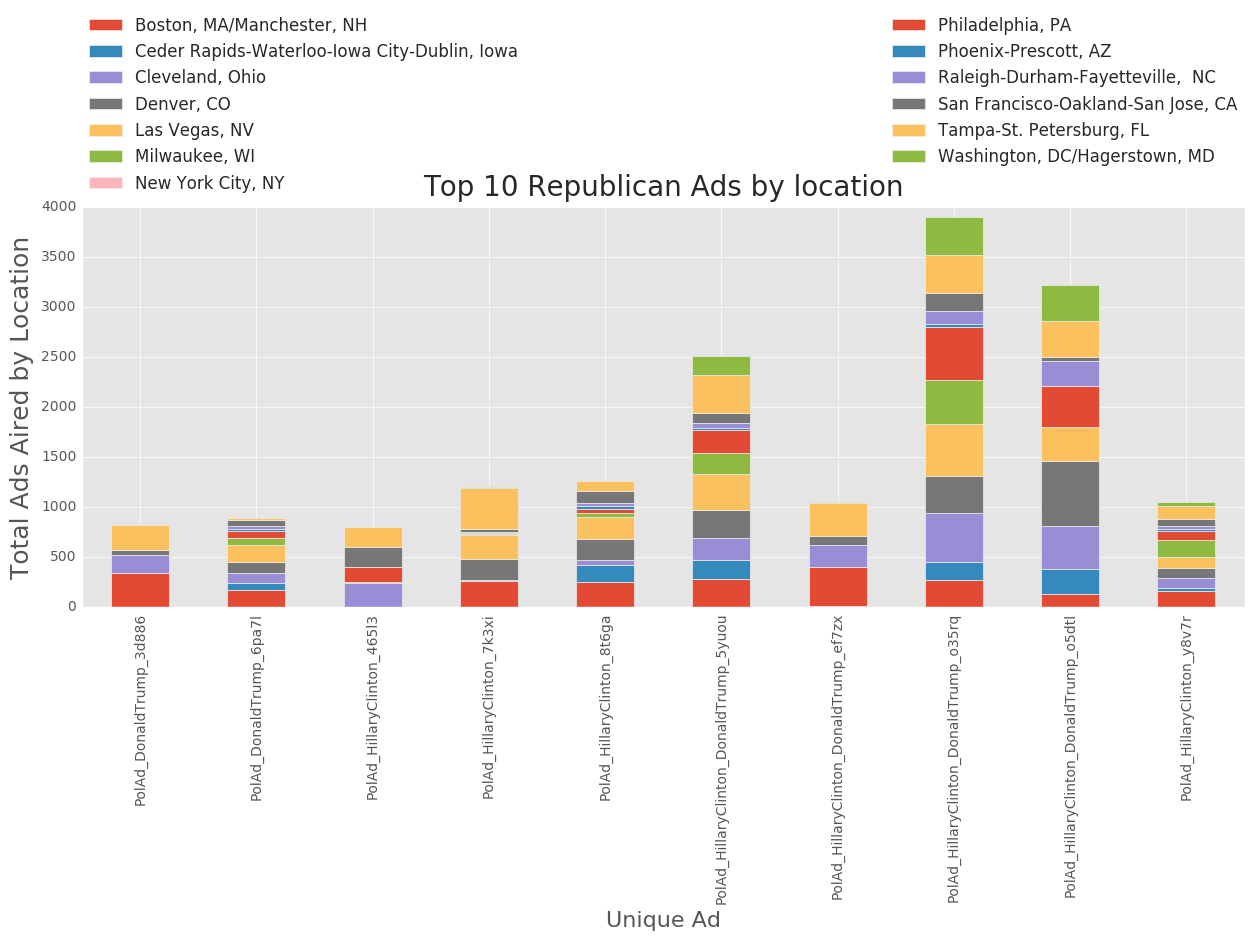

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
ax = rep_ad_loc_10.plot(ax=ax, kind='bar', stacked=True)

# Add some more Labeling
ax.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.title("Top 10 Republican Ads by location",  y=1.01, size=20)
plt.xlabel("Unique Ad", size=16)
plt.ylabel("Total Ads Aired by Location", size=18)
plt.savefig('granular_pics/rep_unique_bar_location.png')

In [61]:
## group by date aired and location for top ad
df_rep_ad1 = df_rep[df_rep['archive_id'] == rep_counts.index[0]]
df_rep_ad1_date_loc = df_rep_ad1.groupby(['date_aired', 'location']).count()
df_rep_ad1_date_loc.reset_index(inplace=True)
df_rep_ad1_date_loc = df_rep_ad1_date_loc.drop(['wp_identifier', 'network', 'program', 'program_type', 'start_time', 'end_time', 
                               'embed_url', 'day_of_week', 'metro_area', 'state', 'subject_count', 'hour_aired',
                               'sponsor_class', 'party', 'archive_id', 'r_c', 'fc_min', 'sponsors', 'sponsor_types',
                               'race', 'cycle', 'subjects', 'candidates', 'type', 'message', 'date_created', 'ad_length'],
                               axis=1)
df_rep_ad1_date_loc = df_rep_ad1_date_loc.pivot(index='date_aired', columns='location', values='id')
df_rep_ad1_date_loc.head()

location,"Boston, MA/Manchester, NH","Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa","Cleveland, Ohio","Denver, CO","Las Vegas, NV","Milwaukee, WI","Philadelphia, PA","Phoenix-Prescott, AZ","Raleigh-Durham-Fayetteville, NC","San Francisco-Oakland-San Jose, CA","Tampa-St. Petersburg, FL","Washington, DC/Hagerstown, MD"
date_aired,,,,,,,,,,,,
2016-10-18,4.0,1.0,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-19,22.0,11.0,16.0,25.0,25.0,29.0,12.0,NaN,10.0,2.0,24.0,39.0
2016-10-20,24.0,13.0,15.0,30.0,40.0,32.0,11.0,NaN,12.0,1.0,17.0,55.0
2016-10-21,30.0,14.0,16.0,31.0,45.0,25.0,11.0,NaN,10.0,4.0,35.0,57.0
2016-10-22,11.0,6.0,5.0,12.0,15.0,12.0,5.0,NaN,2.0,2.0,18.0,23.0


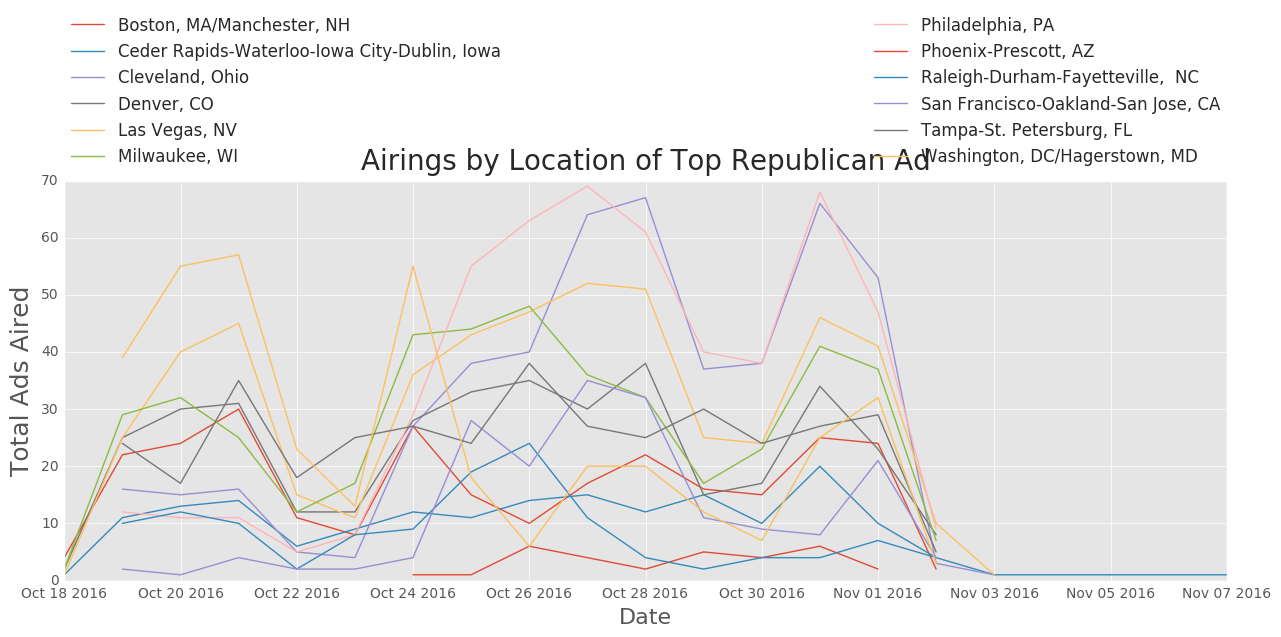

In [63]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,5))
ax = df_rep_ad1_date_loc.plot(ax=ax)

# Add some more Labeling
ax.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.title("Airings by Location of Top Republican Ad",  y=1.01, size=20)
plt.xlabel("Date", size=16)
plt.ylabel("Total Ads Aired", size=18)
plt.savefig('granular_pics/top_rep_ad_time_series.png')

In [76]:
df['month'] = df.date_aired.map(lambda x: x.month)
print(df.month.head())

start_time
2016-08-01 01:19:59    8
2016-08-01 06:20:04    8
2016-08-01 08:39:49    8
2016-08-01 08:48:14    8
2016-08-01 09:09:45    8
Name: month, dtype: int64


In [79]:
## ad counts for Trump after november 1
rep_nov_counts = df[(df.party == 'R') & (df.month == 11)].archive_id.value_counts()
print(rep_nov_counts)

PolAd_HillaryClinton_DonaldTrump_5yuou    2507
PolAd_DonaldTrump_c0h66                    672
PolAd_HillaryClinton_rj13k                 553
PolAd_HillaryClinton_6a8vc                 538
PolAd_HillaryClinton_y8v7r                 404
PolAd_DonaldTrump_u17s5                    393
PolAd_HillaryClinton_DonaldTrump_o35rq     389
PolAd_HillaryClinton_a8tii                 262
PolAd_HillaryClinton_dc0du                 212
PolAd_HillaryClinton_uf9vb                 189
PolAd_HillaryClinton_u8b23                 179
PolAd_HillaryClinton_h4922                 171
PolAd_HillaryClinton_7k3xi                 166
PolAd_HillaryClinton_DonaldTrump_sj8rt     127
PolAd_HillaryClinton_2hb8o                 124
PolAd_HillaryClinton_nmf0t                 121
PolAd_HillaryClinton_i3a2x                 120
PolAd_HillaryClinton_465l3                 115
PolAd_DonaldTrump_HillaryClinton_l4vu4     110
PolAd_DonaldTrump_HillaryClinton_zdce2     109
PolAd_HillaryClinton_49kdu                  98
PolAd_Hillary

In [90]:
print(rep_counts)

PolAd_HillaryClinton_DonaldTrump_o35rq    3902
PolAd_HillaryClinton_DonaldTrump_o5dtl    3216
PolAd_HillaryClinton_DonaldTrump_5yuou    2507
PolAd_HillaryClinton_8t6ga                1262
PolAd_HillaryClinton_7k3xi                1198
PolAd_HillaryClinton_y8v7r                1051
PolAd_HillaryClinton_DonaldTrump_ef7zx    1047
PolAd_DonaldTrump_6pa7l                    887
PolAd_DonaldTrump_3d886                    822
PolAd_HillaryClinton_465l3                 802
PolAd_DonaldTrump_llnn8                    796
PolAd_DonaldTrump_HillaryClinton_su2rx     781
PolAd_HillaryClinton_pv4pc                 771
PolAd_DonaldTrump_c0h66                    672
PolAd_HillaryClinton_pe74t                 645
PolAd_HillaryClinton_uec0r                 627
PolAd_HillaryClinton_g7ybe                 605
PolAd_DonaldTrump_i3wuo                    578
PolAd_HillaryClinton_rj13k                 553
PolAd_HillaryClinton_6a8vc                 538
PolAd_DonaldTrump_r28vd                    513
PolAd_DonaldT

In [ ]:
## group by date aired and archive_id
df_dem_date_loc = df_dem.groupby(['date_aired', 'location']).count()
df_dem_date_loc.reset_index(inplace=True)
df_dem_date_loc = df_dem_date_loc.drop(['wp_identifier', 'network', 'program', 'program_type', 'start_time', 'end_time', 
                               'embed_url', 'day_of_week', 'metro_area', 'state', 'subject_count', 'hour_aired',
                               'sponsor_class', 'party', 'archive_id', 'r_c', 'fc_min', 'sponsors', 'sponsor_types',
                               'race', 'cycle', 'subjects', 'candidates', 'type', 'message', 'date_created', 'ad_length'],
                               axis=1)